In [4]:
def get_metrics(input_file):
#     print("input file: ", input_file)
    f = open(input_file,"r")
    fl = f.readlines()
    f.close()

    count = 1
    metrics=[]
    split_title = input_file.split("_")
#     print(split_title)
    metrics.extend([float(split_title[4]), float(split_title[6])])    
    for line in fl:
    #     print(line)
        if count >= 32 and count < 37:
            _, val_str = line.split(":") 
            if defocus.match(line):
                val=float(val_str.split(",")[0])
                metrics.append(val)
    #             print(val)
            if score.match(line):
                val=float(val_str)
                metrics.append(val)
    #             print(val)
            if thon_rings.match(line):
                val=float(val_str.split("Angstroms")[0])
                metrics.append(val)
    #             print(val)
        count+=1
    all_metrics[split_title[0]].append(metrics)

In [5]:
import sys
import re
import os
from collections import defaultdict
import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


defocus = re.compile(r"Estimated defocus values[ ]+: [-+]?[0-9]*\.?[0-9]+ , [-+]?[0-9]*\.?[0-9]+ Angstroms")
score = re.compile(r"Score[ ]+: [-+]?[0-9]*\.?[0-9]+")
thon_rings = re.compile(r"Thon rings with good fit up to[ ]+: [-+]?[0-9]*\.?[0-9]+ Angstroms")

all_metrics = defaultdict(list)
for f in glob.glob('*summary*.txt'):
    get_metrics(f)

In [6]:
all_metrics

defaultdict(list,
            {'stack18': [[0.0, 1500.0, 18112.2, 0.01651, 5.5],
              [3.0, 1750.0, 18118.42, 0.01702, 5.5],
              [2.0, 1250.0, 18115.69, 0.01688, 5.5],
              [4.0, 1500.0, 18120.49, 0.017, 5.5],
              [0.5, 1500.0, 18111.78, 0.0166, 5.5],
              [2.0, 0.0, 18108.56, 0.0171, 5.5],
              [3.5, 500.0, 18113.15, 0.01727, 5.5],
              [2.5, 2000.0, 18117.98, 0.01692, 5.5],
              [3.0, 0.0, 18108.7, 0.01724, 5.5],
              [0.0, 500.0, 18110.15, 0.01674, 5.5],
              [1.5, 750.0, 18112.59, 0.0169, 5.5],
              [0.5, 500.0, 18109.87, 0.01681, 5.5],
              [0.0, 250.0, 18107.09, 0.01683, 5.5],
              [1.5, 1000.0, 18114.22, 0.0168, 5.5],
              [1.0, 1750.0, 18111.96, 0.01656, 5.5],
              [0.5, 750.0, 18111.0, 0.01675, 5.5],
              [0.5, 2000.0, 18111.81, 0.01654, 5.5],
              [1.5, 2000.0, 18114.86, 0.0166, 5.5],
              [3.5, 1250.0, 18119.16, 0

In [11]:
np.set_printoptions(suppress=True)
for i,stack in enumerate(all_metrics.keys()):
    stack_metrics=np.array(all_metrics[stack])
    max_pos=np.argmax(stack_metrics[:,3])
    print(stack)
    print(stack_metrics[max_pos])

stack18
[    4.         0.     18103.78       0.0175     5.5   ]
stack17
[    4.        500.      16389.45        0.01709     5.8    ]
stack20
[    4.          0.      15376.36        0.01738     5.8    ]
stack19
[    4.    1000.   19569.02     0.01     5.4 ]
stack16
[    3.5     2000.     24893.76       0.0163     5.3   ]


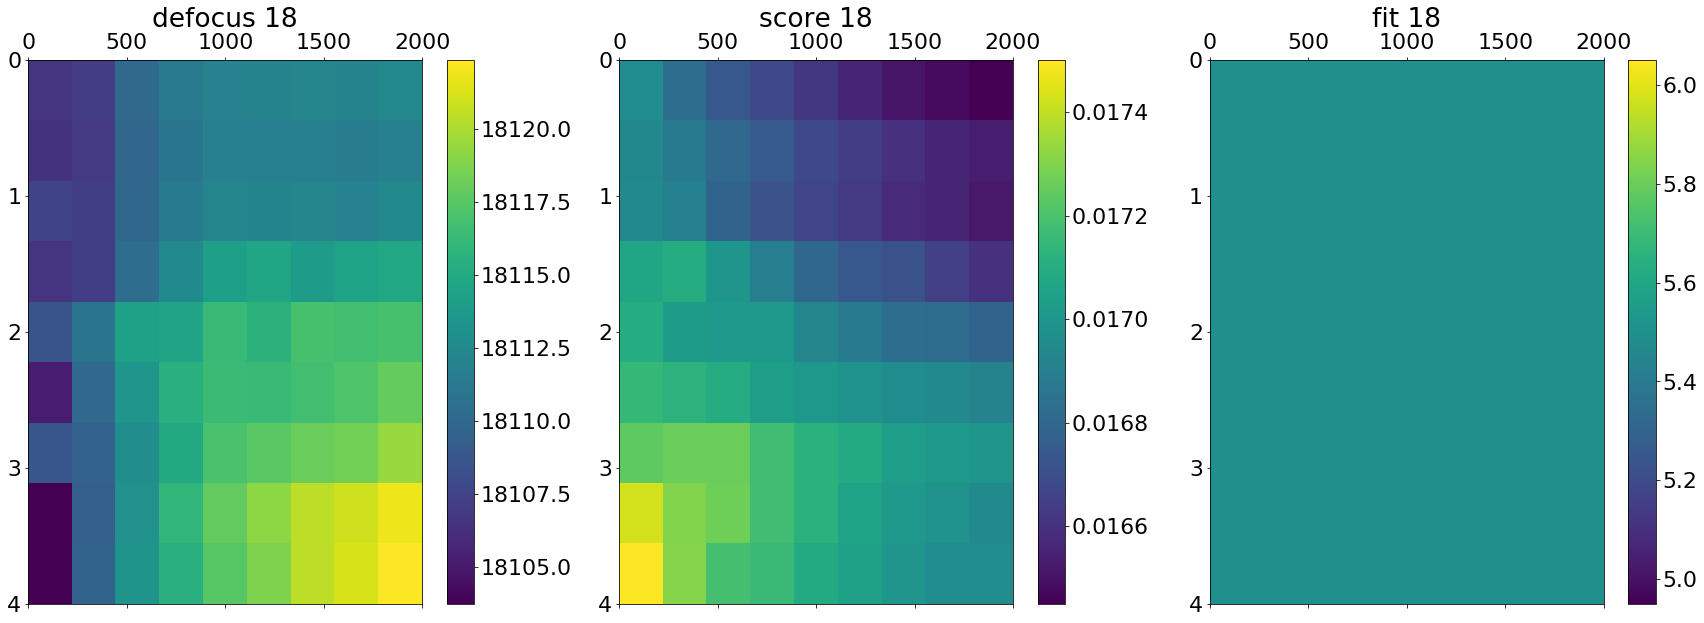

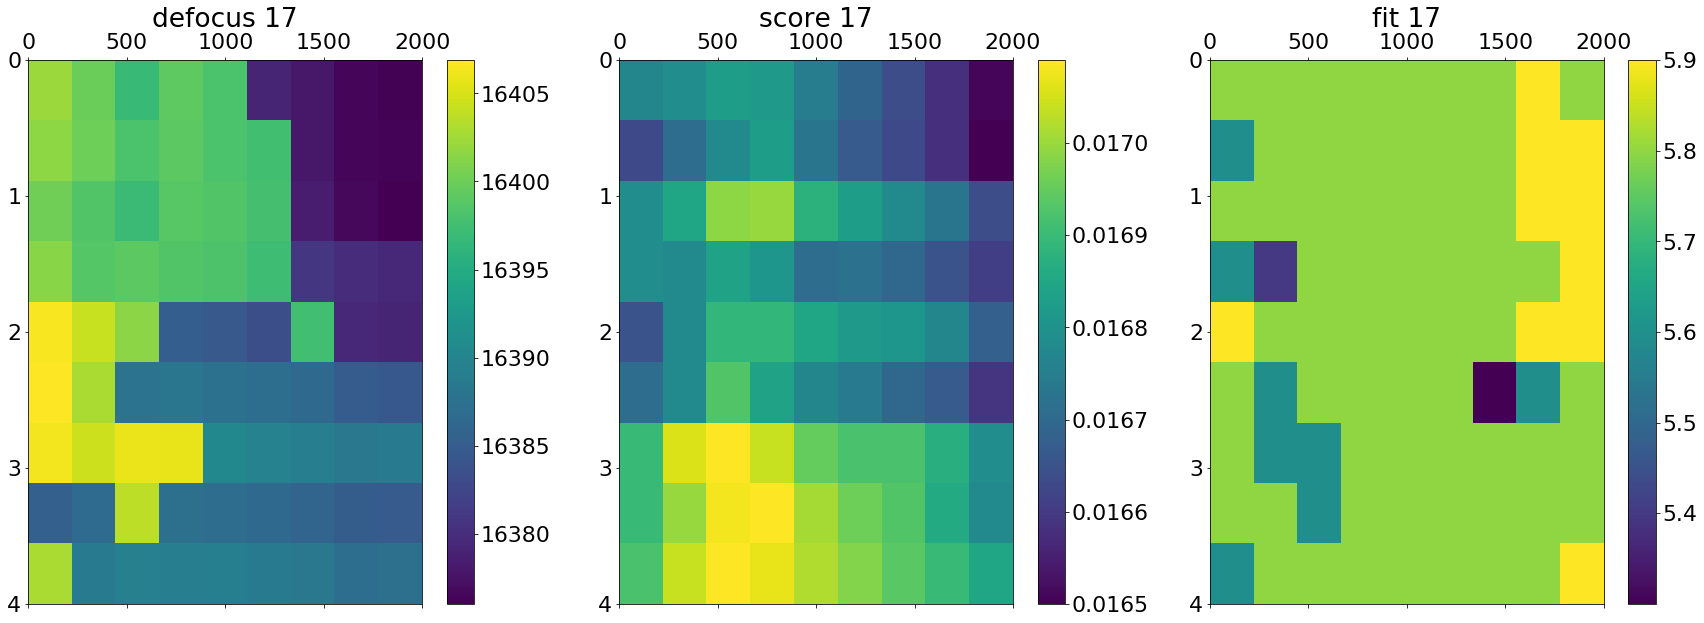

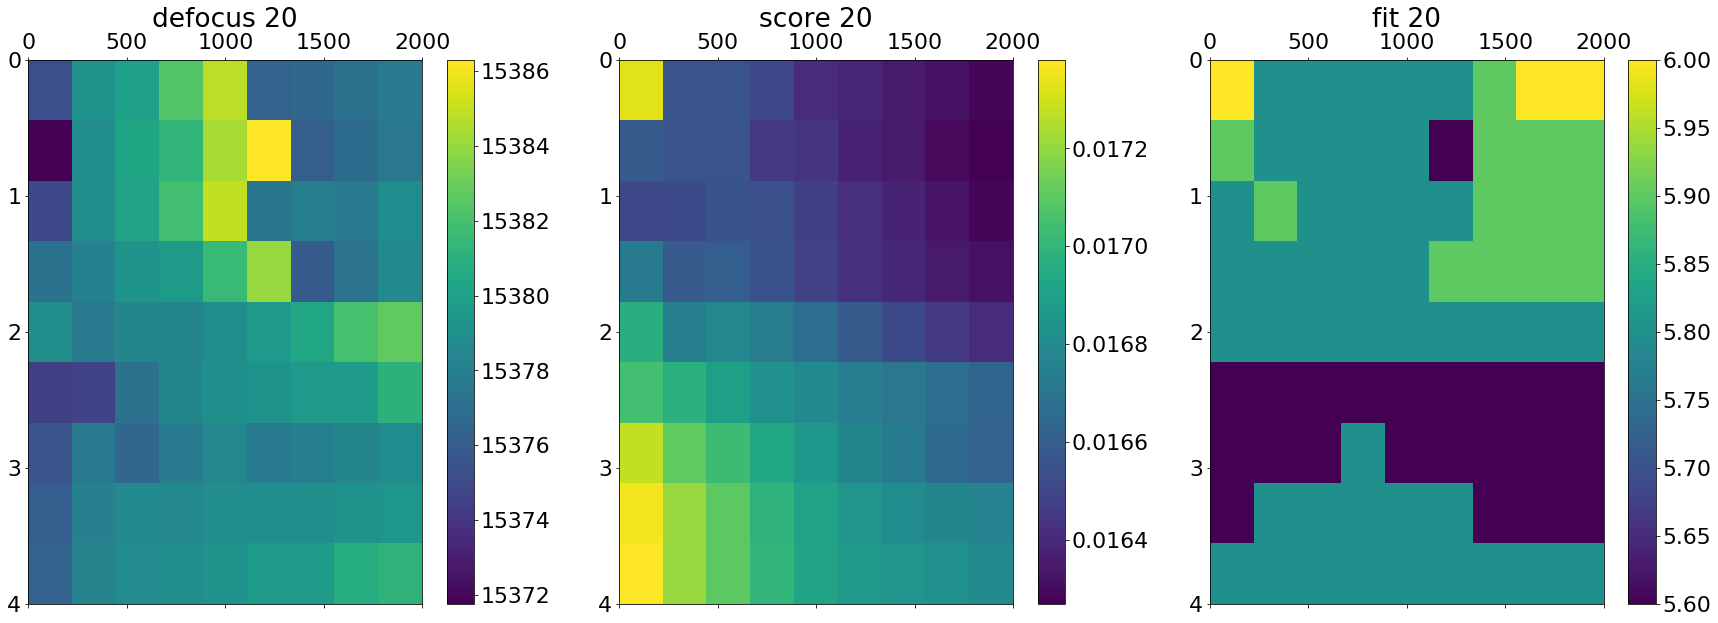

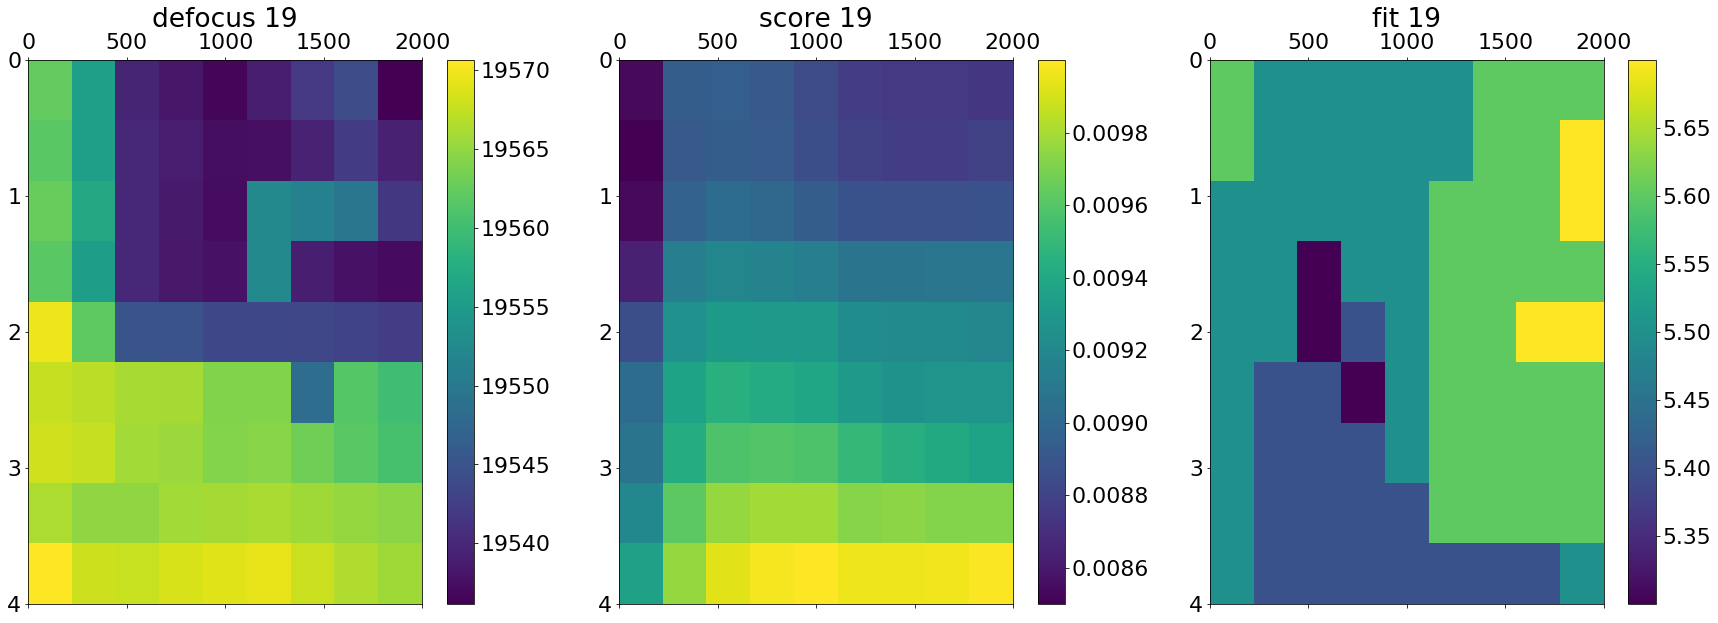

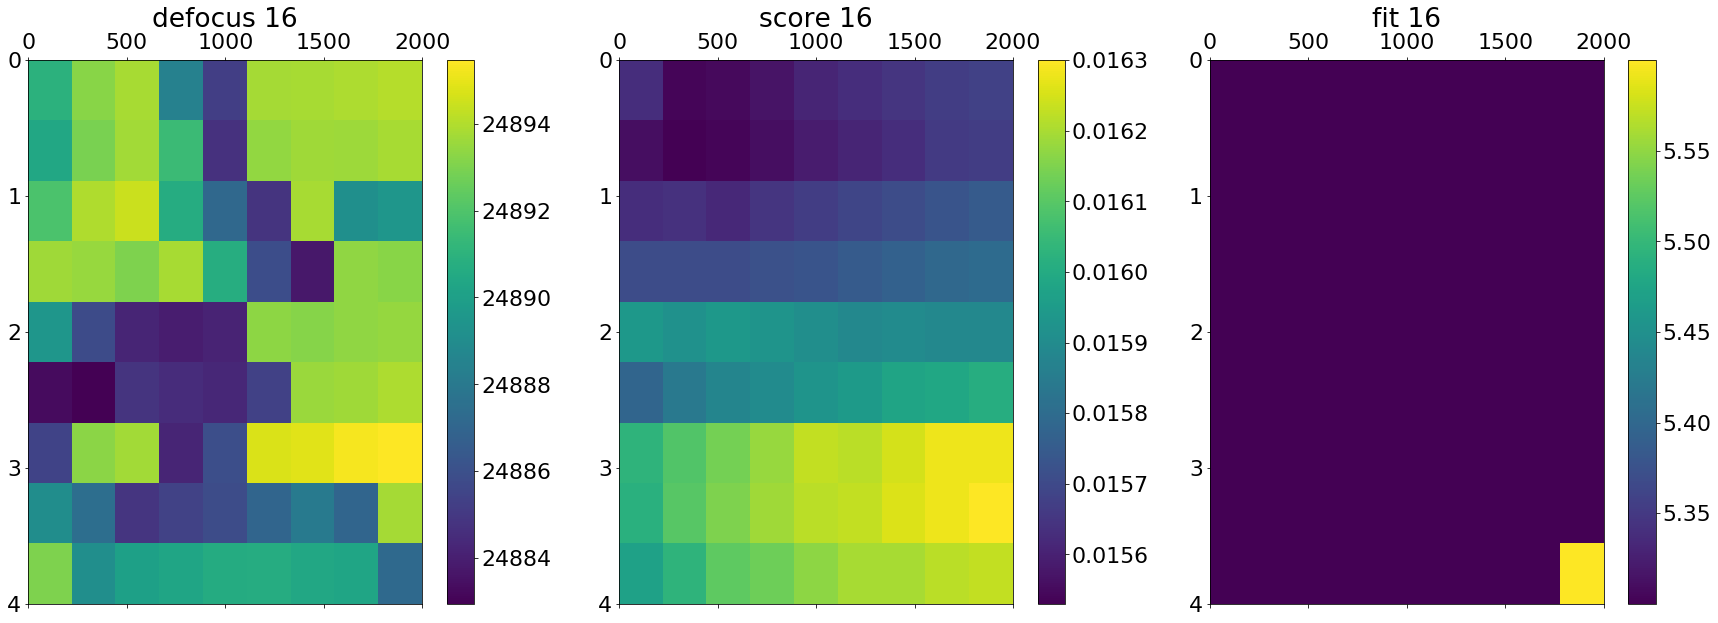

In [14]:
plt.rcParams.update({'font.size': 22})
for i,stack in enumerate(all_metrics.keys()):
    num = i+1
    stack_num = int(stack.split('stack')[-1])
    stack_metrics=np.array(all_metrics[stack])
    hard_threshold_mul = sorted(set(stack_metrics.T[0]))
#     print(hard_threshold_mul)

    bfactors = sorted(set(stack_metrics.T[1]))
#     print(bfactors)

    twoddefocus=[]
    twodscores=[]
    twodfit=[]
    scores=[]
    fit=[]
    for thres in hard_threshold_mul:
        vals=np.array(list(filter(lambda x: x[0] == float(thres), stack_metrics)),dtype='float32')
#         print(vals)
        order = vals[:,1].argsort()
    #     print(order)
    #     print(vals[order])
        twoddefocus.append(list(vals[order][:,2]))
        twodscores.append(list(vals[order][:,3]))
        twodfit.append(list(vals[order][:,4]))
        means=vals.mean(axis=0)
        scores.append(means[3])
        fit.append(means[4])
    #     print(vals[:,3])
    # print(twodscores)
    # print(twodfit)
#     print(twodscores)
    extent = [min(bfactors), max(bfactors), max(hard_threshold_mul), min(hard_threshold_mul)]

    fig, axes = plt.subplots(1, 3,figsize=(30,10))
#     fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

    # fig, ax = plt.subplots()
    # divider = make_axes_locatable(ax)
    # cax = divider.append_axes('right', size='5%', pad=0.05)

    mat = axes[0].matshow(twoddefocus,extent=extent,aspect='auto')
    axes[0].set_title('defocus {}'.format(stack_num))
    fig.colorbar(mat,ax=axes[0])

    mat = axes[1].matshow(twodscores,extent=extent,aspect='auto')
    axes[1].set_title('score {}'.format(stack_num))
    fig.colorbar(mat,ax=axes[1])

    mat = axes[2].matshow(twodfit,extent=extent,aspect='auto')
    axes[2].set_title('fit {}'.format(stack_num))
    fig.colorbar(mat,ax=axes[2])